In [1]:
import numpy as np
import pandas as pd
import flask
from pkgtopicmodeling.paperdata import paperdata
from pkgtopicmodeling.model import model
import pickle
import gensim

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NAIDU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NAIDU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NAIDU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
class server:
    __modelfilename = 'topicmodel.pkl'
    
    def __init__(self):
        print('server instantiated')
        self.__data = paperdata()
        self.__data.loadAndPreprocess()
        
    def process(self):
        
        self.__model = model(self.__data)
        self.__model.createbasemodel()
        print('model creation done')
    
    def loadandtest(self,testdata):
        print('loading model')
        with open(self.__modelfilename ,'rb') as file:
            self.__model = pickle.load(file)
        
        print('testing')
        tokens = self.__data.preprocess(testdata)
        print(tokens)
        bow_vector = self.__data.id2word.doc2bow(tokens)
        print(self.__model[bow_vector])
        for index, score in sorted(self.__model[bow_vector][0], key=lambda tup: -1*tup[0]):
            print("Score: {}\t Topic: {}".format(score, self.__model.print_topic(index, 10)))
        
        '''
        for index, score in sorted(self.__model[bow_vector], key=lambda tup: -1*tup[1]):
            print("Score: {}\t Topic: {}".format(score, self.__model.print_topic(index, 5)))
        '''  

server instantiated
starting paperdata
Raw data info :
raw text info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   publish_date   5000 non-null   int64 
 1   headline_text  5000 non-null   object
 2   index          5000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 117.3+ KB
None
   publish_date                                      headline_text  index
0      20030219  aba decides against community broadcasting lic...      0
1      20030219     act fire witnesses must be aware of defamation      1
2      20030219     a g calls for infrastructure protection summit      2
3      20030219           air nz staff in aust strike for pay rise      3
4      20030219      air nz strike to affect australian travellers      4
0              [aba, decid, commun, broadcast, licenc]
1                  [act, fire, wit, must, awar, defam]

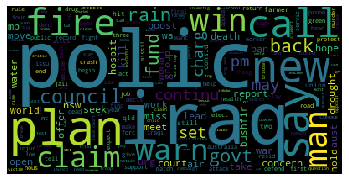

0 --> aba
1 --> broadcast
2 --> commun
3 --> decid
4 --> licenc
5 --> act
6 --> awar
7 --> defam
8 --> fire
9 --> must
show top 10 words by count
gensim bag of words (wordid : wordcount) 
 [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)], [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)], [(16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(16, 1), (18, 1), (22, 1), (23, 1), (24, 1), (25, 1)], [(26, 1), (27, 1), (28, 1), (29, 1), (30, 1)], [(31, 1), (32, 1), (33, 1), (34, 1), (35, 1)], [(36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)], [(17, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1)], [(48, 1), (49, 1), (50, 1), (51, 1), (52, 1)]]
gensim Tfidf data (wordid : Tfidf value) 

[(0, 0.5003721583152674), (1, 0.5003721583152674), (2, 0.3327689307079783), (3, 0.39647145007883855), (4, 0.4809684338849004)]
[(5, 0.33919140650981666), (6, 0.47882016331763666), (7, 0.47882016331763666), (8, 0.26828038589517283), (9, 0.399676

In [4]:
__server = server()
testdata='How a Pentagon deal became an identity crisis for Google'
__server.process()
__server.loadandtest(testdata)